In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import json
import os # OS for file management
from collections import Counter # Counter to build dictionnries given the count of elements
from itertools import chain, combinations # chain to build counters from lists, combinations for faster than two nested loops code
from PIL import Image
sb.set()

In [2]:
cookingData = pd.read_json('train.json')

### Basic Data Exploration
Here, we will first be doing some basic analysis to see what the original train.json data looks like. We can observe that it has the columns with the headers <b>'id'</b>, <b>'cuisine'</b> as well as <b>'ingredients'</b>.

In [3]:
cookingData.head(n=20)

id      cuisine                                        ingredients
0   10259        greek  [romaine lettuce, black olives, grape tomatoes...
1   25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2   20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3   22213       indian                [water, vegetable oil, wheat, salt]
4   13162       indian  [black pepper, shallots, cornflour, cayenne pe...
5    6602     jamaican  [plain flour, sugar, butter, eggs, fresh ginge...
6   42779      spanish  [olive oil, salt, medium shrimp, pepper, garli...
7    3735      italian  [sugar, pistachio nuts, white almond bark, flo...
8   16903      mexican  [olive oil, purple onion, fresh pineapple, por...
9   12734      italian  [chopped tomatoes, fresh basil, garlic, extra-...
10   5875      italian  [pimentos, sweet pepper, dried oregano, olive ...
11  45887      chinese  [low sodium soy sauce, fresh ginger, dry musta...
12   2698      italian  [Italian parsley leaves, walnuts, hot red pepp...
13  41995      mexican  [ground cinnamon, fresh cilantro, chili powder...
14  31908      italian  [fresh parmesan cheese, butter, all-purpose fl...
15  24717       indian  [tumeric, vegetable stock, tomatoes, garam mas...
16  34466      british  [greek yogurt, lemon curd, confectioners sugar...
17   1420      italian  [italian seasoning, broiler-fryer chicken, may...
18   2941         thai   [sugar, hot chili, asian fish sauce, lime juice]
19   8152   vietnamese  [soy sauce, vegetable oil, red bell pepper, ch...

### Dataframe Size

We can observe that the dataframe has the following below:
<ul>
    <li>Columns: 3</li>
    <li>Rows: 39774</li>
      
</ul>

In [4]:
print("Data type : ", type(cookingData))
print("Data dims : ", cookingData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (39774, 3)


In [5]:
print(cookingData.dtypes)

id              int64
cuisine        object
ingredients    object
dtype: object


### Dataframe Conversion 

Here we have converted our train.json data into a Dataframe, and sorted the dataframe in ascending order for its <b>'id'</b>

In [6]:
cookingDataDf = pd.DataFrame(cookingData)
cookingDataDf = cookingDataDf.sort_values(by=['id'],ascending=True)
cookingDataDf.head(n=40)

id       cuisine                                        ingredients
31571   0       spanish  [mussels, ground black pepper, garlic cloves, ...
25290   1       mexican  [tomatoes, diced red onions, paprika, salt, co...
23447   2        french  [chicken broth, truffles, pimentos, green pepp...
19464   3       chinese  [fresh ginger, sesame oil, frozen peas, cooked...
19690   4       italian  [orange peel, cookies, vanilla ice cream, gran...
16474   6       chinese  [olive oil, sesame oil, soy sauce, flowering g...
811     8        french  [whole milk, fine sea salt, vanilla sugar, lem...
10799   9   southern_us  [sweet potatoes, all-purpose flour, pepper, ap...
36482  10       chinese  [black pepper, crushed red pepper flakes, top ...
20701  14       italian  [olive oil, balsamic vinegar, toasted pine nut...
39077  15       mexican  [water, crescent dinner rolls, sour cream, cre...
15276  16        indian  [curry powder, fat free reduced sodium chicken...
36780  19       mexican  [red kidnei beans, rins and drain, chile peppe...
15955  20       italian  [lemon zest, fresh lemon juice, mayonaise, sal...
11420  21          thai  [mushrooms, light coconut milk, boneless skinl...
29547  22       mexican  [canola, jalapeno chilies, salsa, onions, cide...
25961  24   southern_us  [large eggs, vanilla extract, firmly packed li...
24383  25       mexican          [vegetable oil, corn tortillas, sea salt]
8449   27       mexican  [lime, garlic cloves, cooked white rice, white...
37205  29  cajun_creole  [louisiana hot sauce, ground black pepper, lar...
1646   30      jamaican  [dried thyme, green onions, all-purpose flour,...
813    31       mexican  [vidalia onion, chopped green bell pepper, fre...
25405  32      japanese  [ground black pepper, crushed red pepper, corn...
36366  33       mexican  [diced potatoes, beef, salt, corn tortillas, w...
13434  34         greek  [pepper, grated parmesan cheese, salt, ground ...
38656  37       mexican  [queso fresco, margarine, chicken breasts, ext...
13788  38   southern_us  [oysters, clam juice, chopped celery, okra, me...
33768  39       mexican  [tostada shells, cheese, ground beef, shredded...
26924  40       russian  [active dry yeast, white sugar, warm water, sa...
1185   41       mexican  [hamburger buns, jalapeno chilies, avocado, ga...
2193   43        french  [capers, cooking spray, anchovy fillets, fresh...
30504  44         irish  [brown sugar, cooking spray, all-purpose flour...
20423  45   southern_us  [brown sugar, cinnamon, vanilla, peach juice, ...
26543  46        indian  [vegetable oil, onions, curry leaves, green ch...
2047   48        indian  [red chili powder, ginger, onions, garam masal...
33800  49   southern_us  [baking soda, white sugar, water, light corn s...
6883   50        indian  [vegetable oil, purple onion, ground cumin, ga...
7852   53  cajun_creole  [dried thyme, paprika, ground red pepper, drie...
31253  54          thai  [eggs, light soy sauce, chicken breasts, roast...
27088  55       mexican  [knorr garlic minicub, disco empanada frozen, ...

### Count of how many of each cuisine is in the Dataframe

Here, we are using value_counts to figure out how many of each type of cuisine is given to us in the Dataframe, which we will be using for the later parts

In [7]:
cookingDataDf['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

### Visualizing the number of each cuisine available

The above column of integers is not so intuitive, so we decided to display our data using plots as seen below.

<AxesSubplot:>

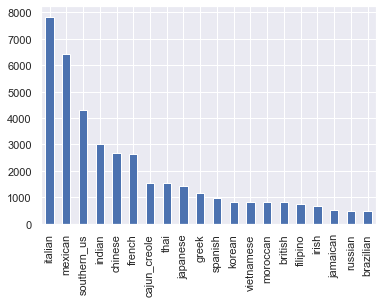

In [8]:
cookingData['cuisine'].value_counts().plot(kind='bar')

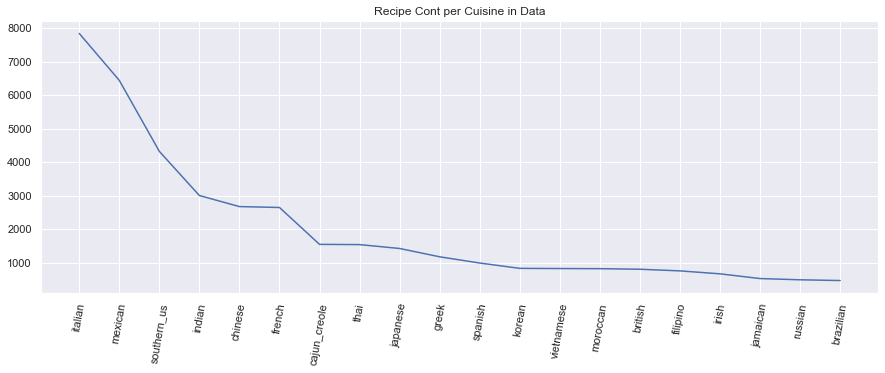

In [9]:
plt.figure(figsize=(15,5))
plt.title('Recipe Cont per Cuisine in Data')
ax = cookingDataDf['cuisine'].value_counts().plot()
plt.xticks(np.arange(len(cookingDataDf['cuisine'].unique())), cookingDataDf['cuisine'].value_counts().index, rotation=80)
plt.show()

### Counting how many of a particular ingredient is used across different cuisines

Let us assume we want to find out how many dishes in each cuisine use 'vegetable oil', which we have used in our presentation. We need a way to get that information. And so, we used the <b>'.map'</b> function, which takes an iterable and carries out the <b>'.join'</b> function to combine all the ingredients in each row, with the <b>';'</b> as the seperator
>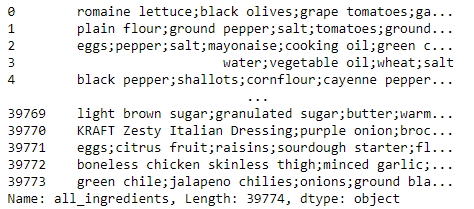

Here, we can observe that now, each ingredient is seperated by the <b>';'</b> that we have used for the join function

In [10]:
cookingData['all_ingredients'] = cookingData['ingredients'].map(";".join)

In [11]:
cookingData['all_ingredients'].str.contains('vegetable oil')

0        False
1         True
2        False
3         True
4        False
         ...  
39769    False
39770    False
39771    False
39772    False
39773    False
Name: all_ingredients, Length: 39774, dtype: bool

### Comparing the number of "Vegetable Oil" in each cuisine versus the total ingredients count.

In this bar plot, we narrow down the ingredient list to just Vegetable Oil. From there, we do comparison for the number of Vegetable Oil found in each cuisines and the original total number of all ingredients in the cuisines. 

### To further include additional ingredients in the comparison, the following lines could be used instead.  
<ul>
  <li><b>indices = cookingdata['all_ingredients'].str.contains('vegetable oil')</b></li>
 
  <li><b> he = cookingdata['all_ingredients'].str.contains('onions')</b></li>
 
  <li><b>cookingdata[indices][he]['cuisine'].value_counts().head(5).plot(kind='bar', rot=9, color='orange', fontsize=11,
                                                 
                                                 title='Vegetable oil & Onions as found per cuisine')</b></li>
</ul>
                                                 
All the data shown in the barplot are the top 7. Adjustments can be made by changing the .head(X) where X is the number of data(in order of descending) you wish to display.

<AxesSubplot:title={'center':'vegetable oil as found per cuisine'}>

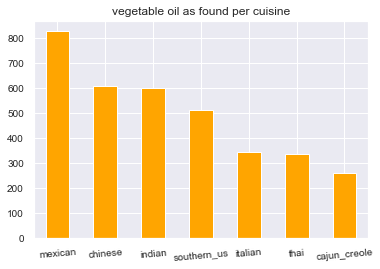

In [12]:
indices = cookingData['all_ingredients'].str.contains('vegetable oil')
cookingData[indices]['cuisine'].value_counts().head(7).plot(kind='bar', color="orange", rot=5, fontsize=10,title='vegetable oil as found per cuisine')

<AxesSubplot:title={'center':'Olive oil as found per cuisine'}>

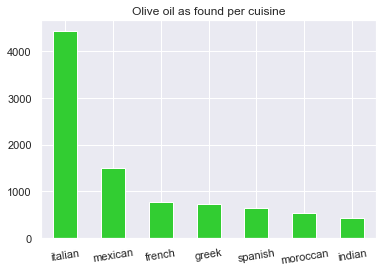

In [13]:
indices2 = cookingData['all_ingredients'].str.contains('olive oil')
cookingData[indices2]['cuisine'].value_counts().head(7).plot(kind='bar', color="limegreen", rot=9, fontsize=11,
                                                 title='Olive oil as found per cuisine')

### Normalizing the data

We know that the dataset contains a higher value of italian cuisines as compared to say, brazillian. If we count the number of a particular ingredient used by a particular cuisine, it will not be a fair representation. This, we have to normalize the data as seen below:
<ul>
    <li><b>The orange barplot represents the Vegetable oil(Indices)</b></li>
    <li><b>The green barplot represents the Olive Oil(Indices2)</b></li>
</ul>

<AxesSubplot:>

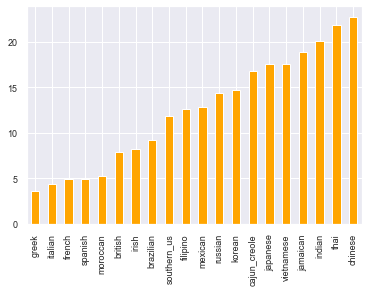

In [41]:
relative_freq = (cookingData[indices]['cuisine'].value_counts() / cookingData['cuisine'].value_counts() * 100)
relative_freq.sort_values(inplace=True)
relative_freq.plot(kind='bar',color="orange", rot=90, fontsize=9)

<AxesSubplot:>

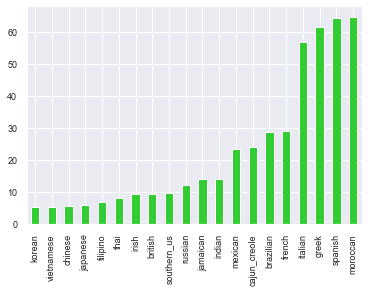

In [42]:
relative_freq = (cookingData[indices2]['cuisine'].value_counts() / cookingData['cuisine'].value_counts() * 100)
relative_freq.sort_values(inplace=True)
relative_freq.plot(kind='bar',color="limegreen", rot=90, fontsize=9)

### Frequency of each ingredient across ALL cuisines

It is just as the title says. Across all cuisines, we want to be able to see how many times each ingredient occurs in its recipes. We do this by using the <b>'.explode()'</b> function that is a part of the pandas library.

The basic explanation of what it does would be that it transforms every element in a row that is similar to a list, into a huge column containing every item in the list. It will be easier to visualize with a picture, which is seen below. This picture was attained from https://www.w3resource.com/pandas/dataframe/dataframe-explode.php

>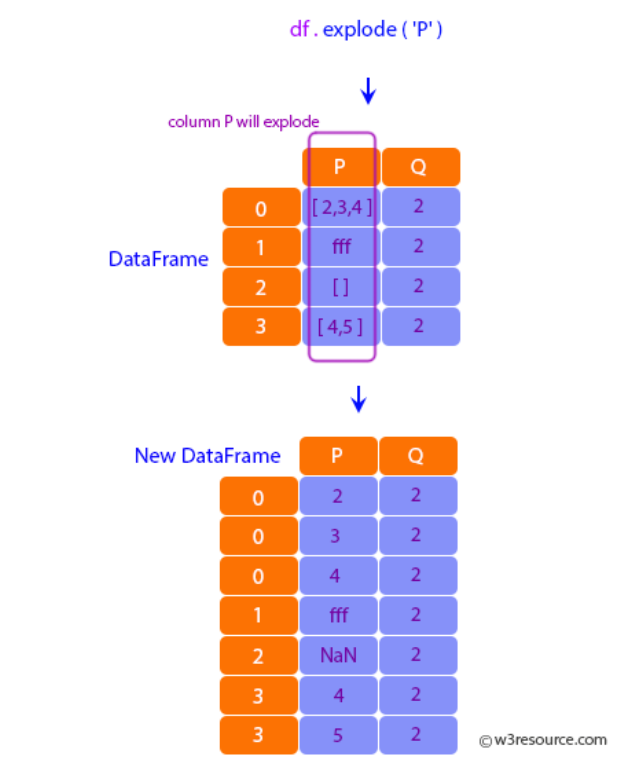

In [16]:
cookingDataDf['ingredients'].explode().value_counts()

salt                   18049
onions                  7972
olive oil               7972
water                   7457
garlic                  7380
                       ...  
filipino eggplant          1
foccacia                   1
turbot fillets             1
non-dairy margarine        1
dry jack                   1
Name: ingredients, Length: 6714, dtype: int64

### Counting the top 15 ingredients across all cuisines

Now that we know how to use the <b>'.explode()'</b> function, it is a simple matter of using <b>'.nlargest(number)'</b> to count the top few ingredients as seen below

In [17]:
top15ingred = cookingDataDf['ingredients'].explode().value_counts().nlargest(15)
top15ingred

salt                   18049
onions                  7972
olive oil               7972
water                   7457
garlic                  7380
sugar                   6434
garlic cloves           6237
butter                  4848
ground black pepper     4785
all-purpose flour       4632
pepper                  4438
vegetable oil           4385
eggs                    3388
soy sauce               3296
kosher salt             3113
Name: ingredients, dtype: int64

### Using a pie-chart to visualize the data more easily
Starting from salt, which is the biggest, the size of each ingredient decreases in a descending order in the anti-clockwise direction. We have also put the values in percentages using the <b>autopct='%.2f'</b> parameter, to round up the values of the percentages to 2 decimal places

<AxesSubplot:ylabel='ingredients'>

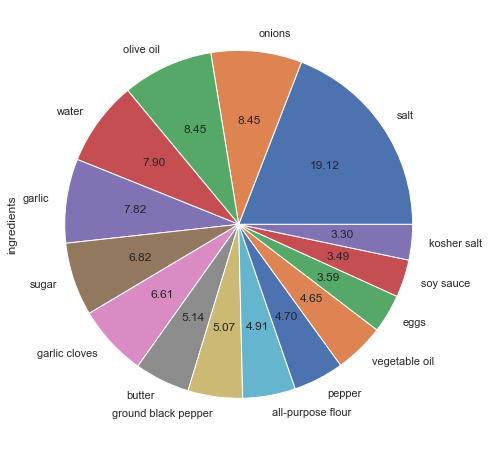

In [18]:
top15ingred.plot.pie(autopct='%.2f',figsize=(8,8))

### Using a WordCloud to visualize the data more easily

In order to use WordCloud, you have to install WordCloud in your laptop by typing this in the command prompt: pip install wordcloud <br>
We also learnt how to use a new visualization tool, known as a WordCloud to visualize our data as well. Below, we can observe the wordcloud we have produced. We have produced 2 different kinds of wordclouds.

<ul>
    <li>Top ingredients used across ALL cuisines</li>
    <li>Top ingredients used by EACH cuisine</li>
</ul>

There are two particular lines of code that are required to change the border of the wordcloud from a square box into the shape of any picture we choose, as seen below. Do note that you will require the chef2.png file in order for the code to display the wordcloud as below, otherwise it will likely show an error message.

<ul>
    <li><b>mask = np.array(Image.open("chef2.png"))</b></li>
    <li><b>from PIL import Image</b> (Was imported in the first line of this ipynb file)</li> 
</ul>

In [19]:
from wordcloud import WordCloud

#This function is mainly to generate the wordcloud and input parameters such as how many words we want using 'max=1000', and the size of the title and so on
def wordcloud_generator(text, title=None, max = 1000, size=(20,10), title_size=20):
    mask = np.array(Image.open("chef2.png"))
    wordcloud = WordCloud(width = 2000, height = 1000, max_words=5000, random_state=0, background_color='white', colormap='Set1', mask = np.array(Image.open('chef2.png'))).generate(text)
    plt.figure(figsize=size)
    plt.title(title, size=title_size)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

### More about Wordcloud 

max refers to the number of words appearing in the wordcloud. 

size refers to the overall image size.

random_state will ensures that the same set of data will be displayed at all times. 

In order to produce the outline of the shape/images, the provided images must have transparent background(usually .png  photos)

#### Top ingredients across ALL cuisines

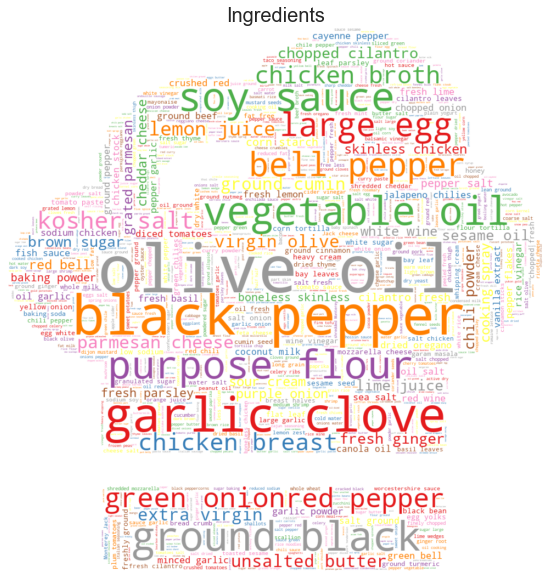

In [20]:
top_list = sum([x for x in cookingData.ingredients],[])
top_list = ' '.join(top_list)
wordcloud_generator(top_list, title='Ingredients')

#### Top ingredients across EACH cuisine
You can remove the 'break' to view the top ingredients for every cuisine, otherwise it will only show the wordcloud for spanish cuisine

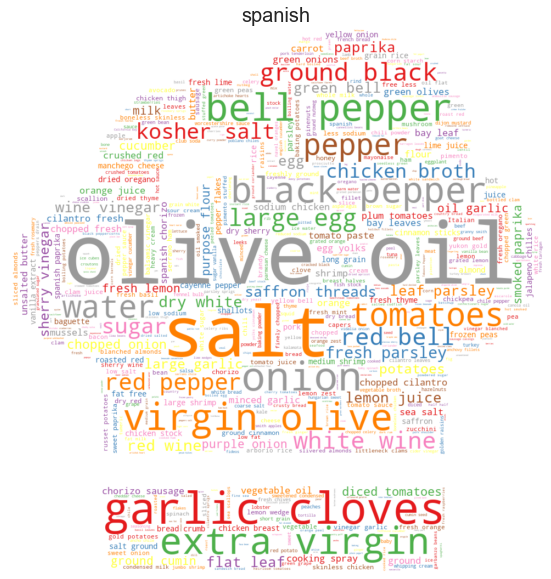

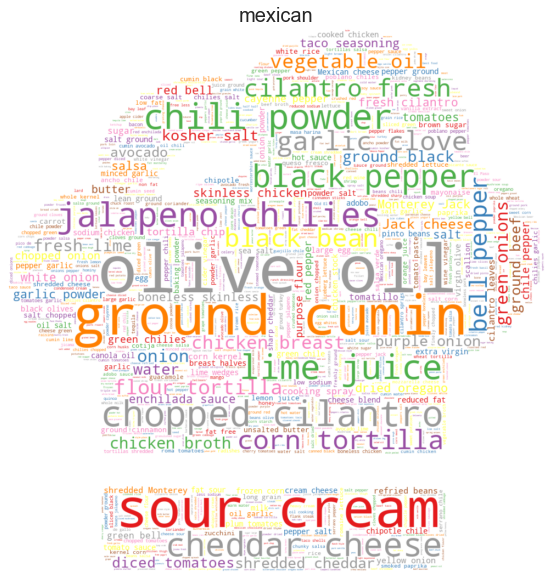

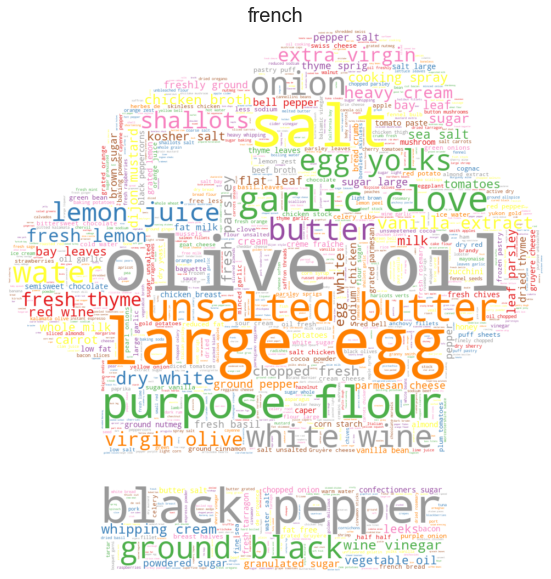

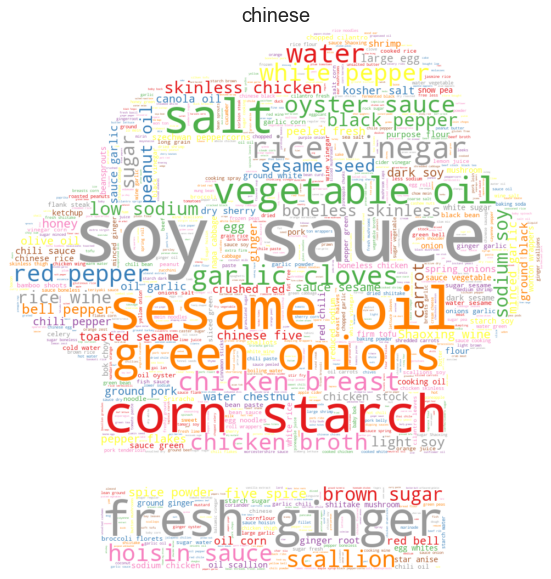

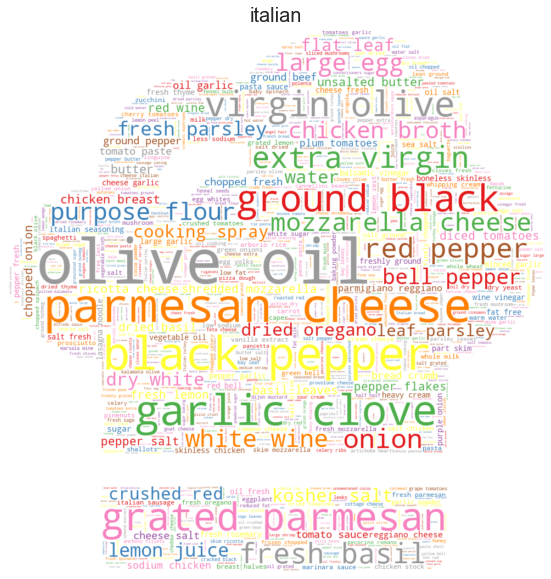

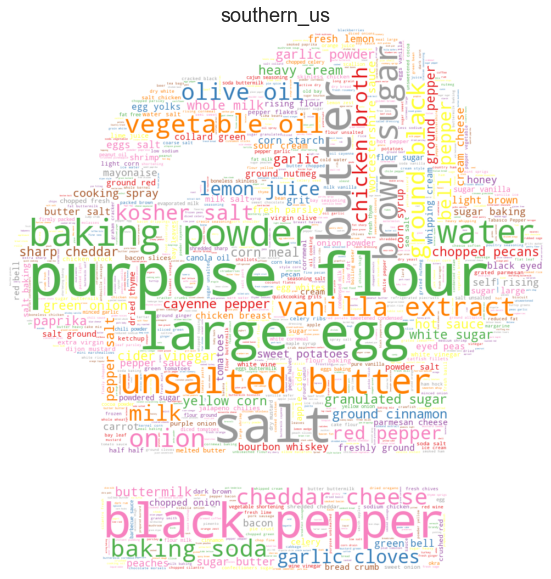

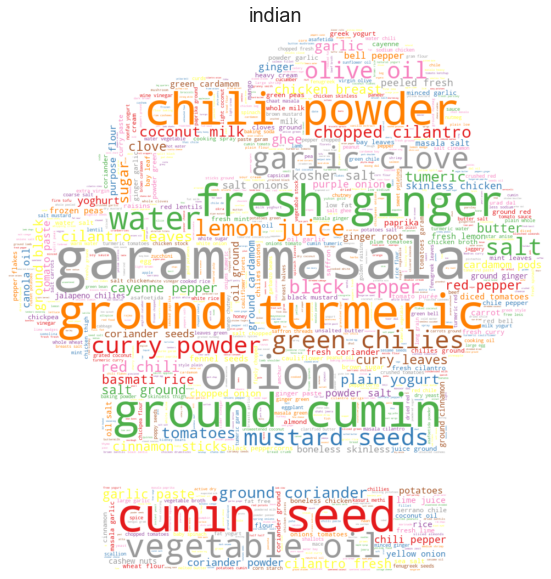

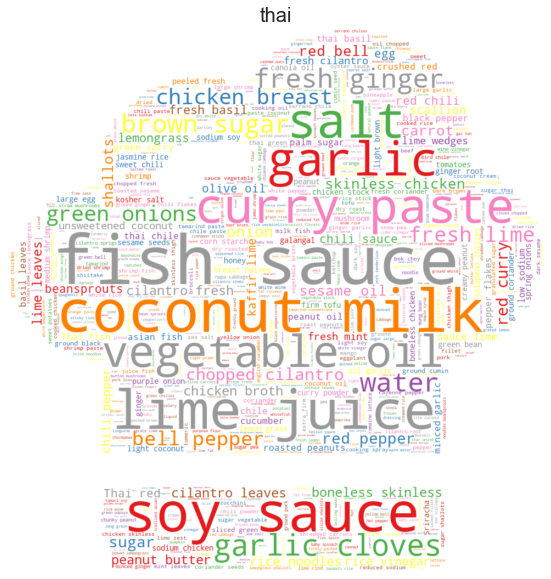

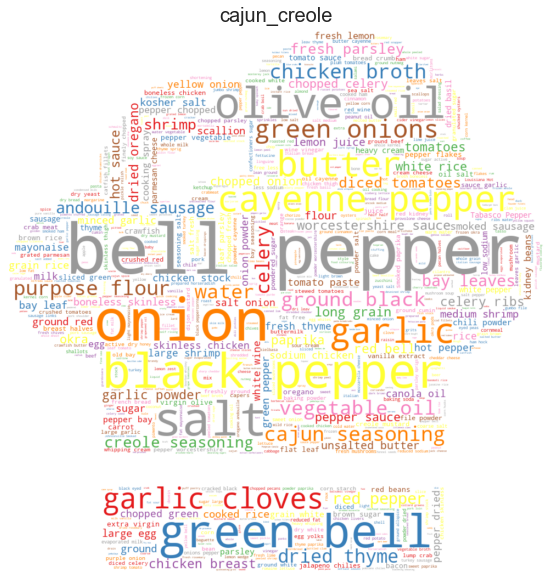

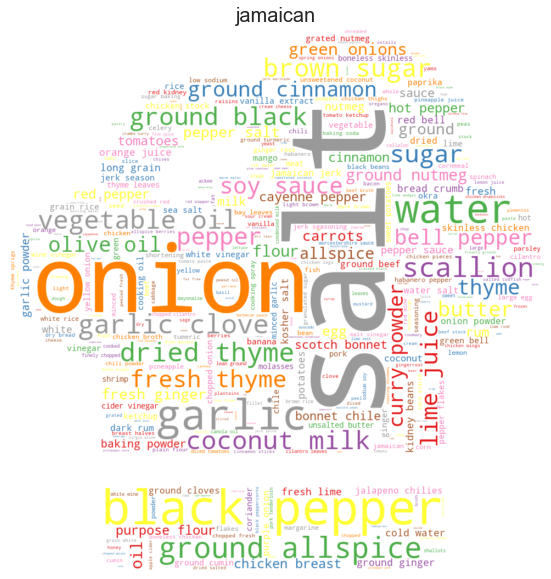

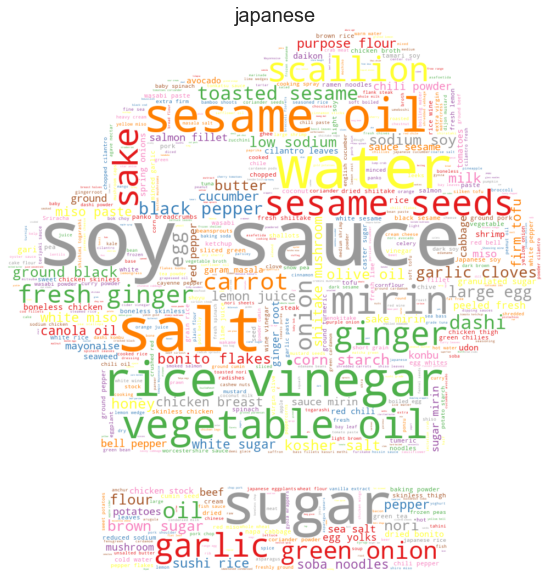

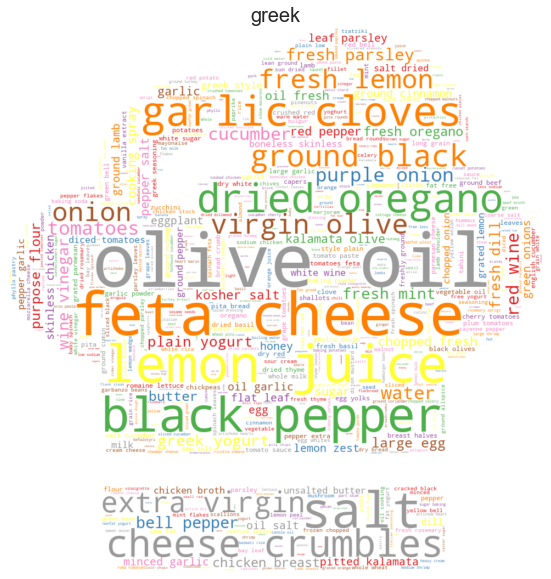

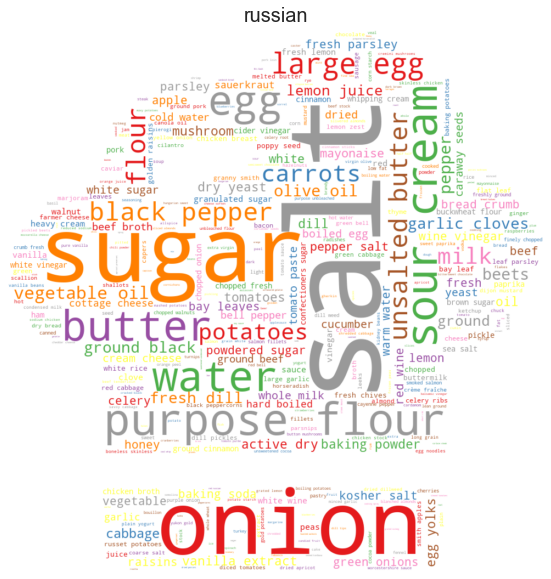

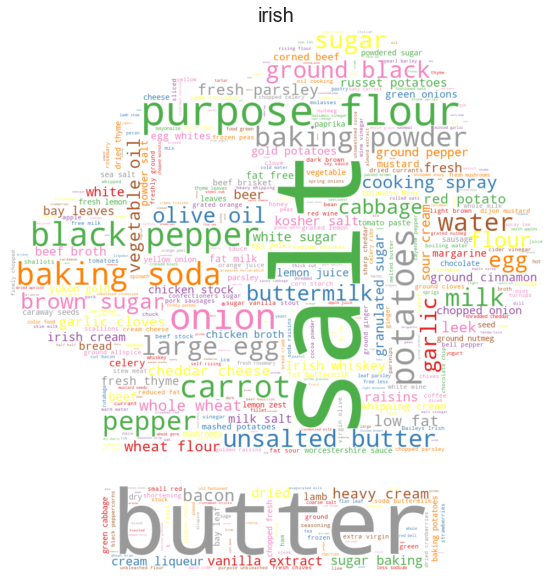

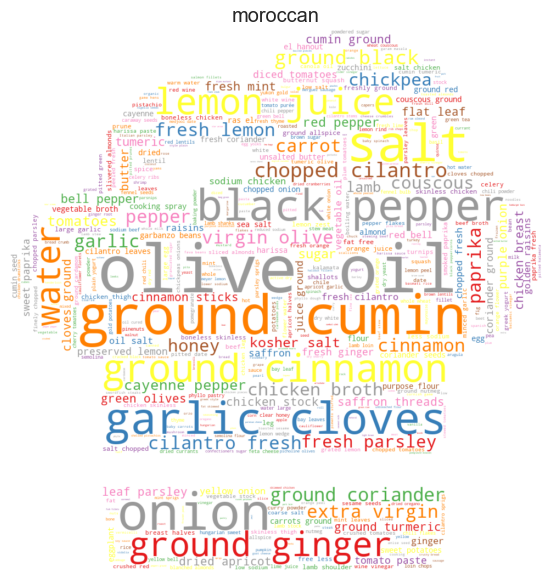

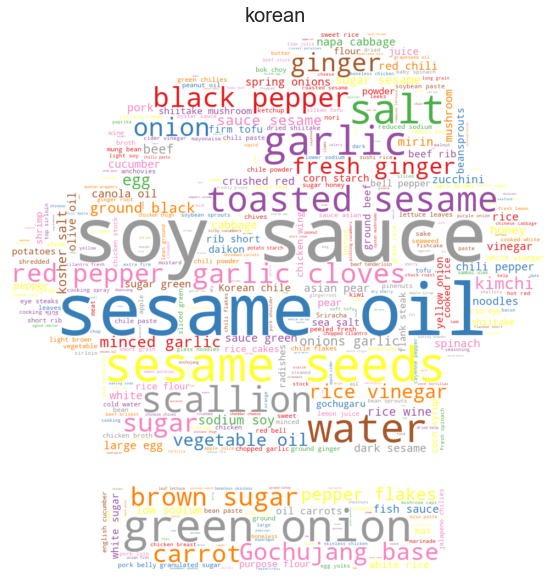

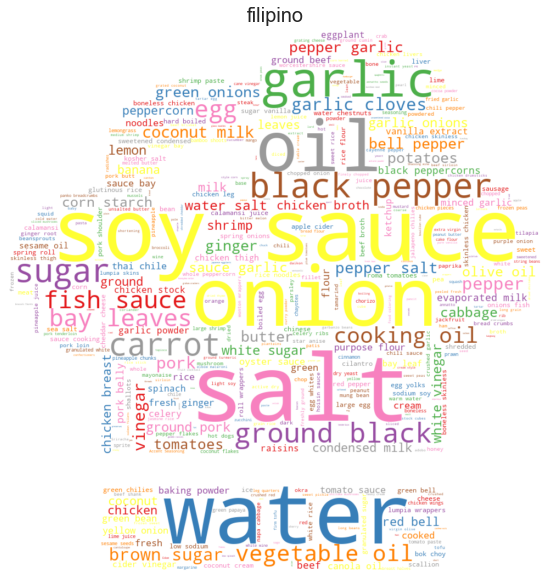

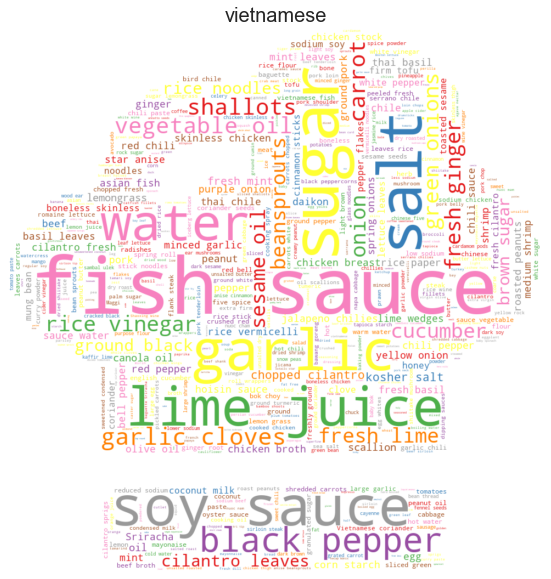

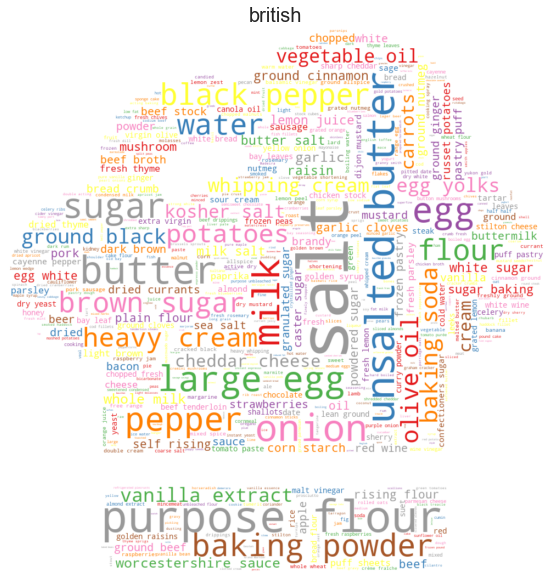

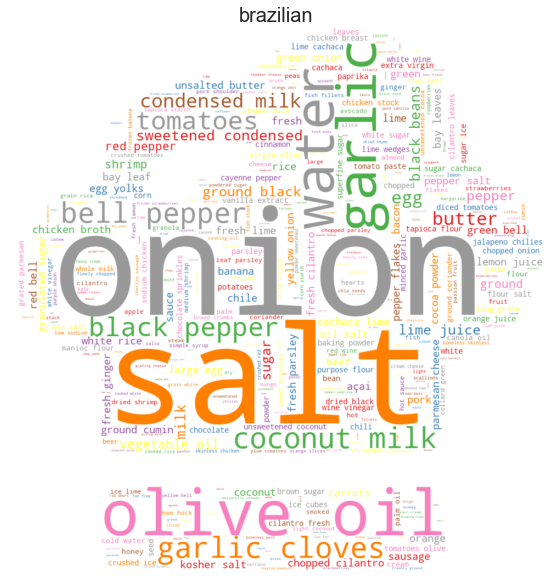

In [43]:
for c in cookingDataDf['cuisine'].unique():
    temp = cookingDataDf[cookingDataDf['cuisine'] == c]
    txt = ' '.join(sum([x for x in temp.ingredients], []))
    wordcloud_generator(txt, title=c)
    

#### More detailed barplot of top ingredients across EACH cuisine
Viewing the top ingredients for every cuisine using a wordcloud as above is not detailed enough, so we have made a barplot that lists the exact values of the top ingredients in each cuisine. We have used a different color for indian, chinese and the rest of the cuisines due to how our presentation slides are prepared

In [22]:
cuisine = cookingData["cuisine"].unique()
 
all_cus = dict()
for cs in cuisine:
    i = []
    for ing_list in cookingData[cookingData['cuisine']==cs]['ingredients']:
        for ing in ing_list:
            i.append(ing)
    all_cus[cs] = i

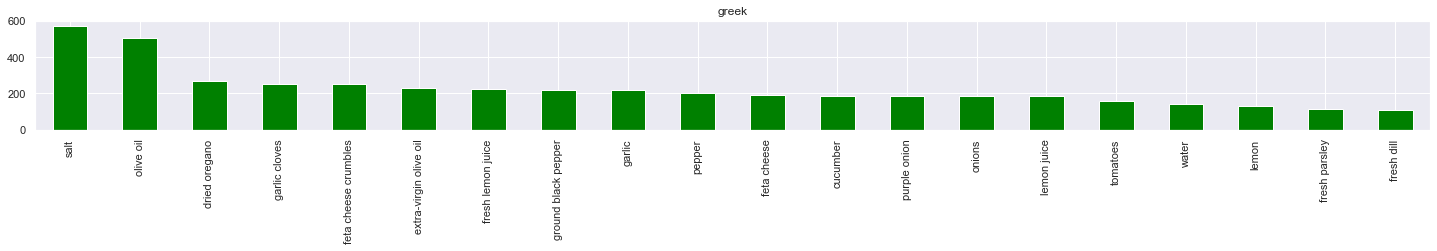

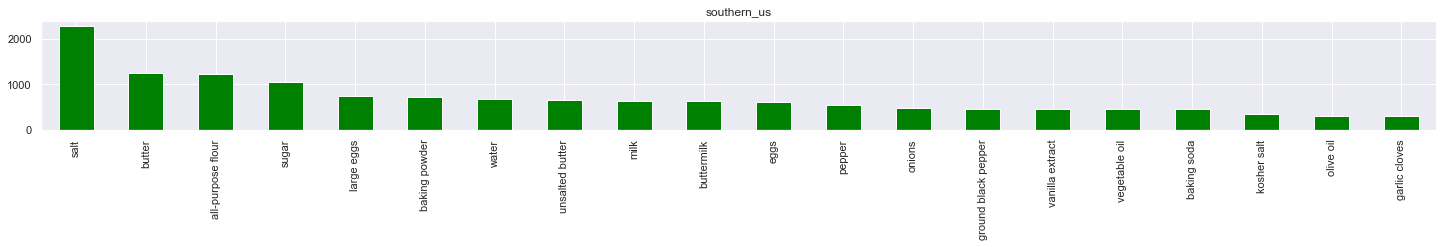

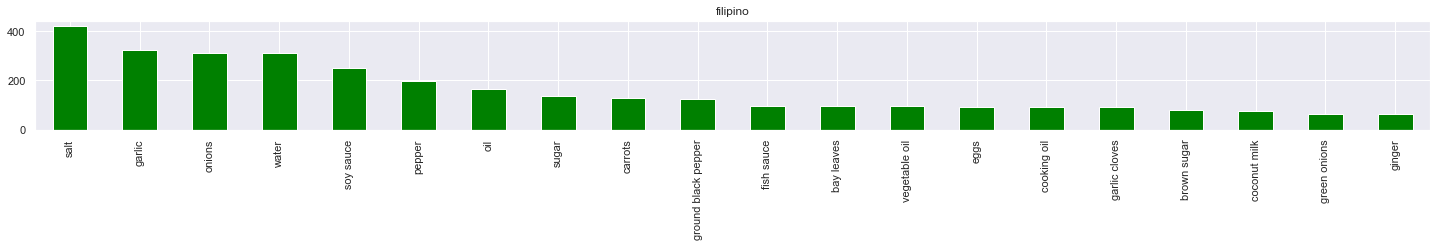

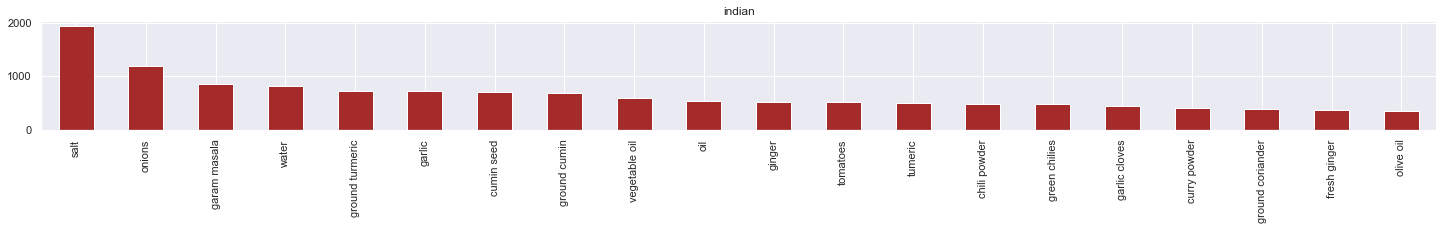

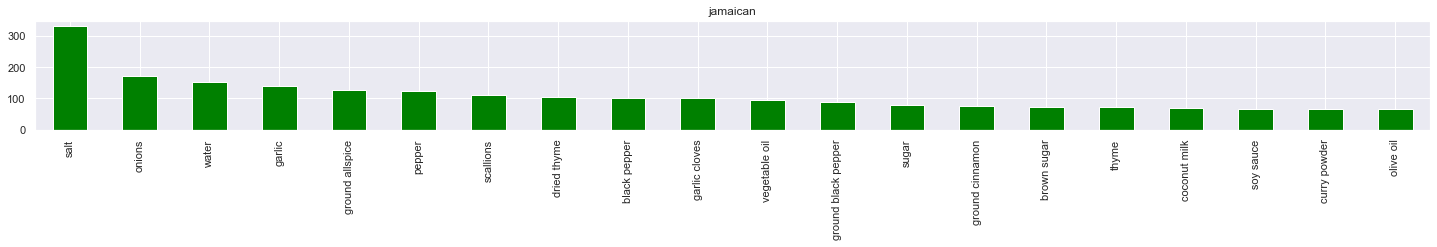

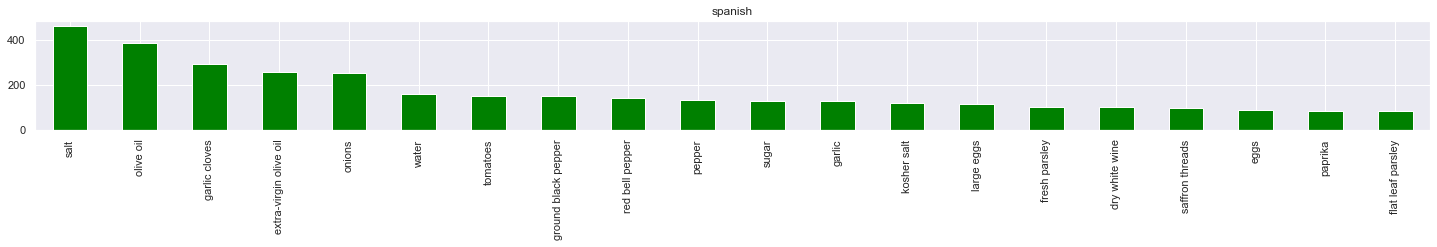

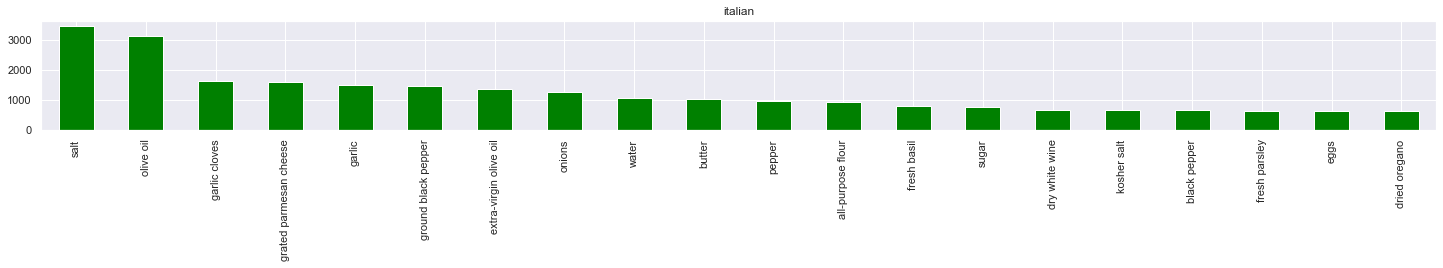

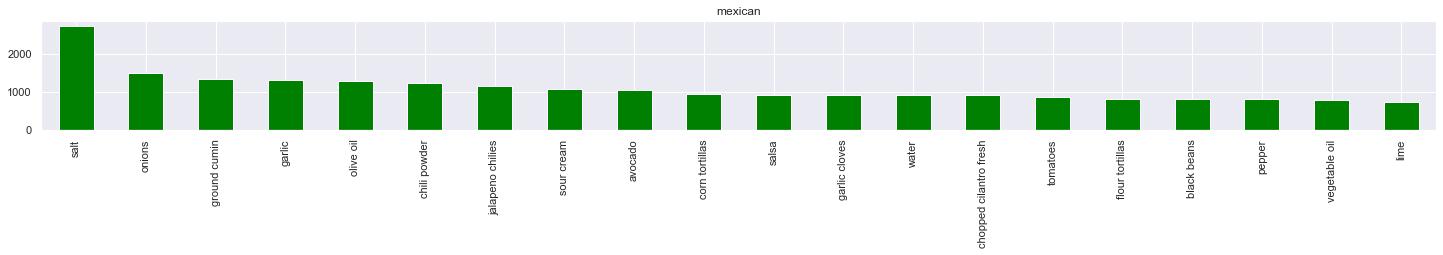

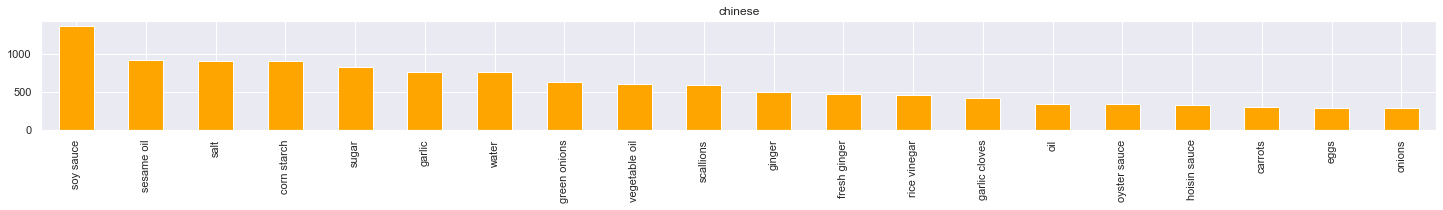

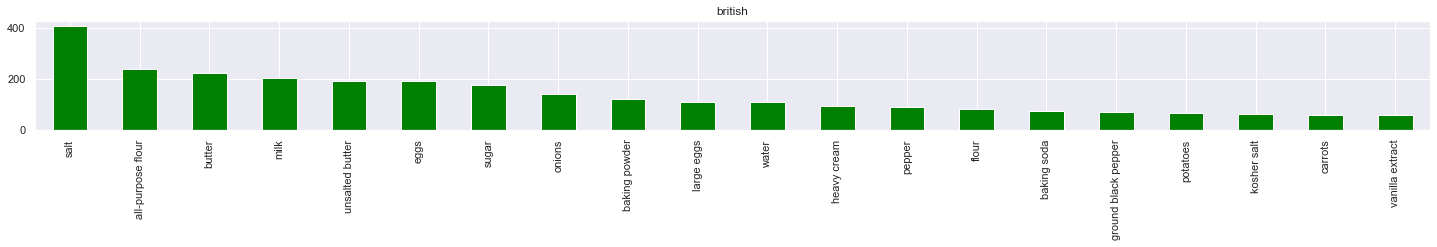

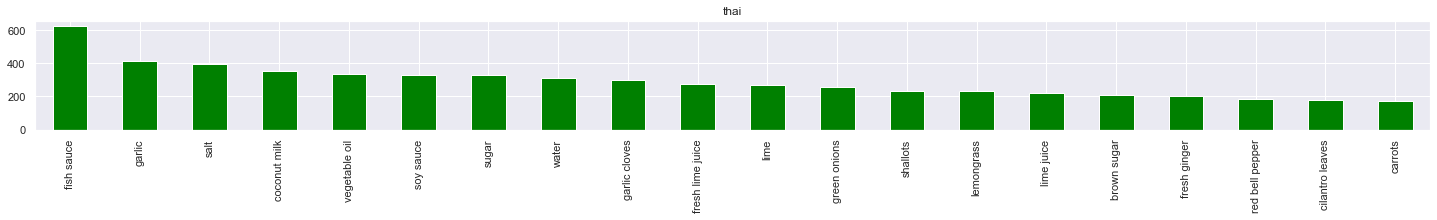

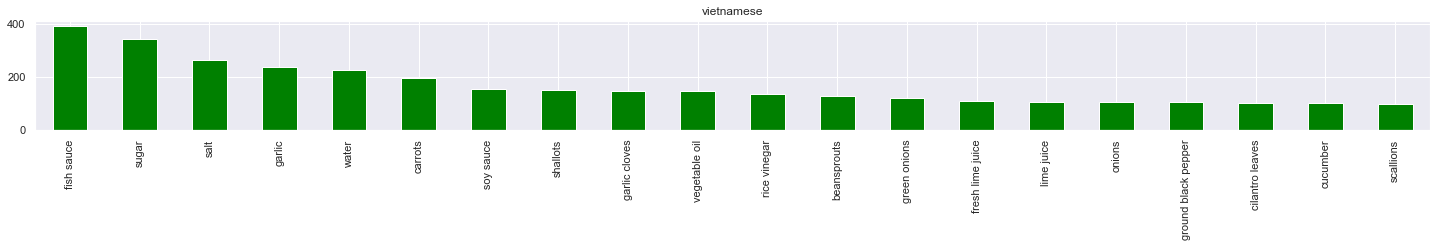

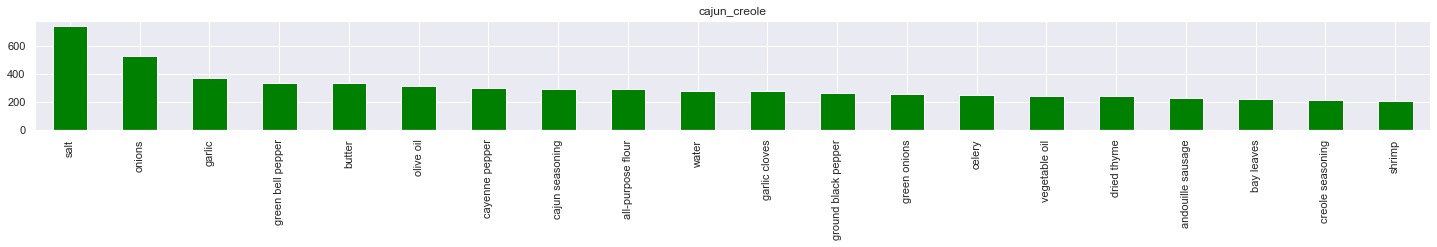

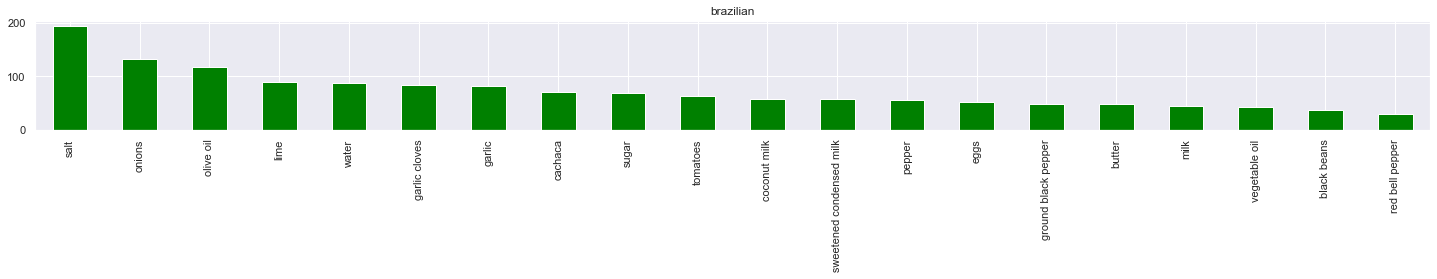

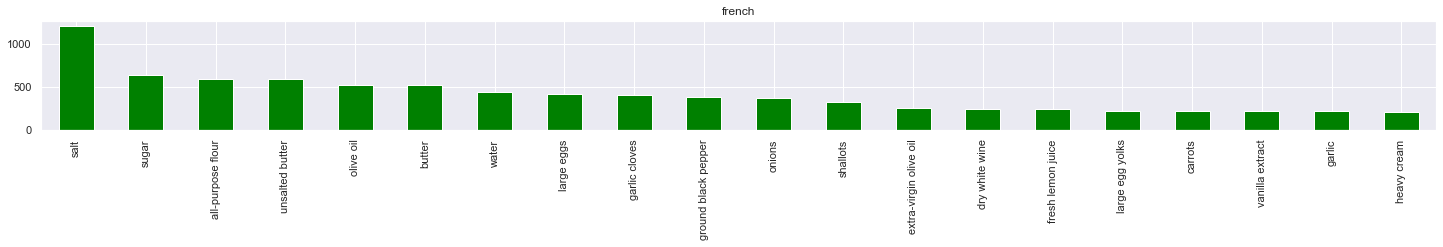

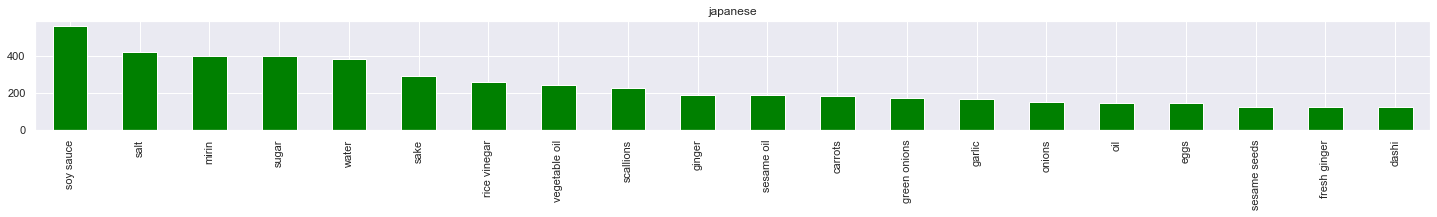

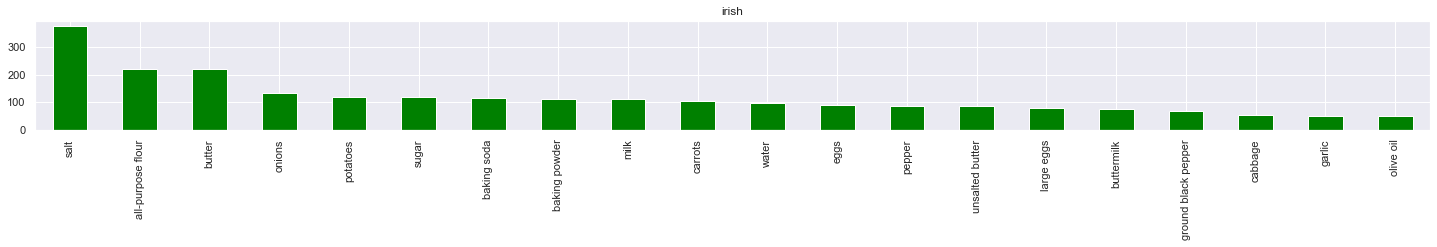

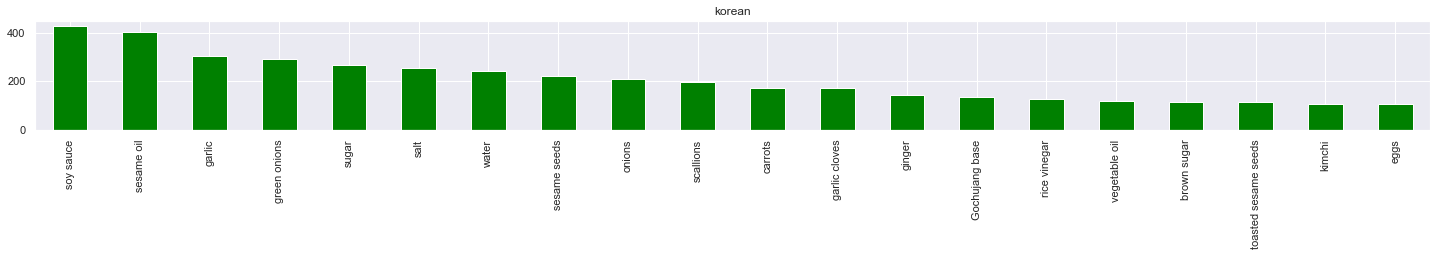

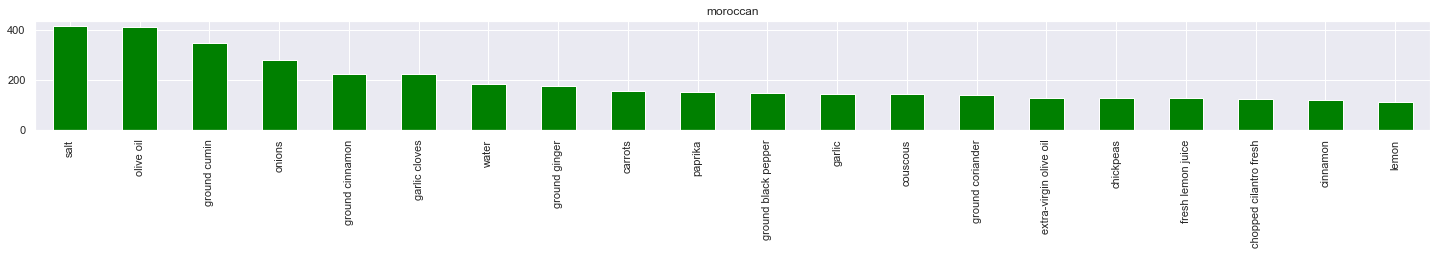

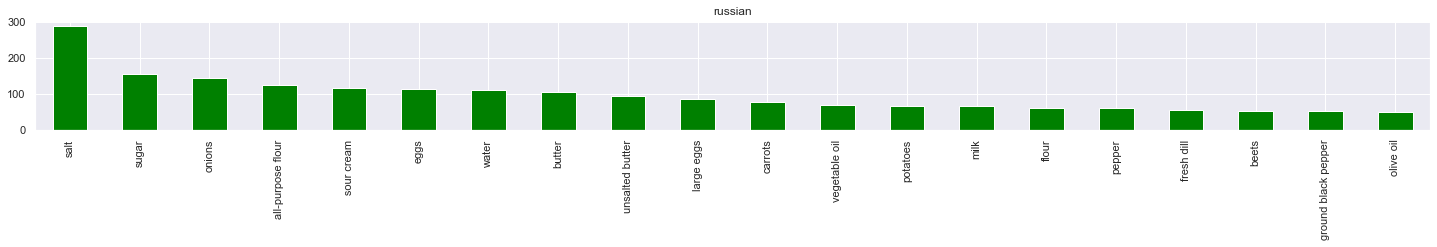

In [23]:
for key in all_cus.keys():   
   fig, ax = plt.subplots(figsize=(25,2))
   clr = "green"
   if key == 'indian':
        clr = "brown" 
   elif key == "chinese":
        clr = "orange"
   pd.Series(all_cus[key]).value_counts().head(20).plot.bar(ax=ax, title=key,color=clr)
   plt.show()

### Converting the ingredient count data into a dictionary

We converted this data we found from above into the form of a dictionary in case it becomes more useful later on, and kept it for now. 

In [24]:
each_ingredient_count = {}
for i in range(len(cookingData)):
    for j in cookingData['ingredients'][i]:
        if j in each_ingredient_count.keys():
            each_ingredient_count[j]+=1
        else:
            each_ingredient_count[j]=1
            
            
each_ingredient_count

{'romaine lettuce': 270,
 'black olives': 229,
 'grape tomatoes': 228,
 'garlic': 7380,
 'pepper': 4438,
 'purple onion': 1896,
 'seasoning': 137,
 'garbanzo beans': 148,
 'feta cheese crumbles': 358,
 'plain flour': 154,
 'ground pepper': 385,
 'salt': 18049,
 'tomatoes': 3058,
 'ground black pepper': 4785,
 'thyme': 361,
 'eggs': 3388,
 'green tomatoes': 108,
 'yellow corn meal': 341,
 'milk': 2263,
 'vegetable oil': 4385,
 'mayonaise': 781,
 'cooking oil': 483,
 'green chilies': 768,
 'grilled chicken breasts': 5,
 'garlic powder': 1442,
 'yellow onion': 1184,
 'soy sauce': 3296,
 'butter': 4848,
 'chicken livers': 65,
 'water': 7457,
 'wheat': 26,
 'black pepper': 2627,
 'shallots': 1477,
 'cornflour': 103,
 'cayenne pepper': 1523,
 'onions': 7972,
 'garlic paste': 282,
 'lemon juice': 1395,
 'chili powder': 2036,
 'passata': 24,
 'oil': 1970,
 'ground cumin': 2747,
 'boneless chicken skinless thigh': 343,
 'garam masala': 925,
 'double cream': 40,
 'natural yogurt': 18,
 'bay leaf

### Counting how many ingredients each dish uses on average

Firstly, we have to talk about the first DataFrame we had created, called cookingDataDf which looked like this;

>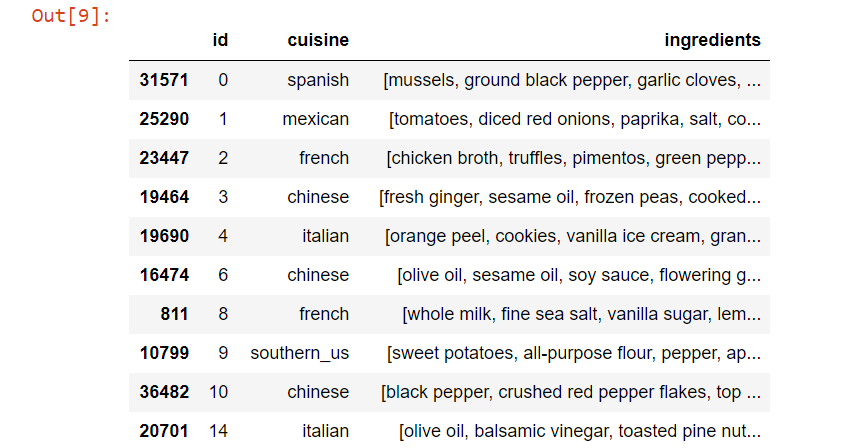

Each single row contains a particular dish that belongs to that particular cuisine, though the name of the dish is not given. For example in the first row that has the id of 0, it is a spanish dish that is made using the ingredients shown in the <b>'ingredients'</b> column. 

We chose to count how many ingredients EACH cuisine uses on average using boxplots, which helps us visualize the data better. This will actually help us solve 2 problems. 

<ul>
    <li>Helps us determine which dishes are less complicated to cook</li>
    <li>Which type of cuisine varies the most in its number of ingredients required</li>
</ul>

We can observe the boxplot we have created below.

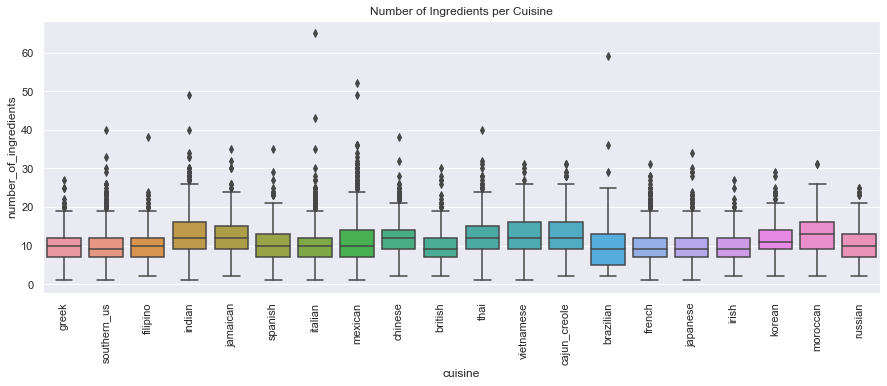

In [25]:
cookingData['number_of_ingredients'] = cookingData.ingredients.map(lambda x: len(x))
plt.figure(figsize=(15,5))
plt.title('Number of Ingredients per Cuisine')
ax = sb.boxplot(x="cuisine", y="number_of_ingredients", data=cookingData)
plt.xticks(rotation=90)
plt.show()

### How many unique ingredients does each cuisine have, and how many different ingredients are there?
Firstly, as for different ingredients, we can have a look at the data in the below picture 
> 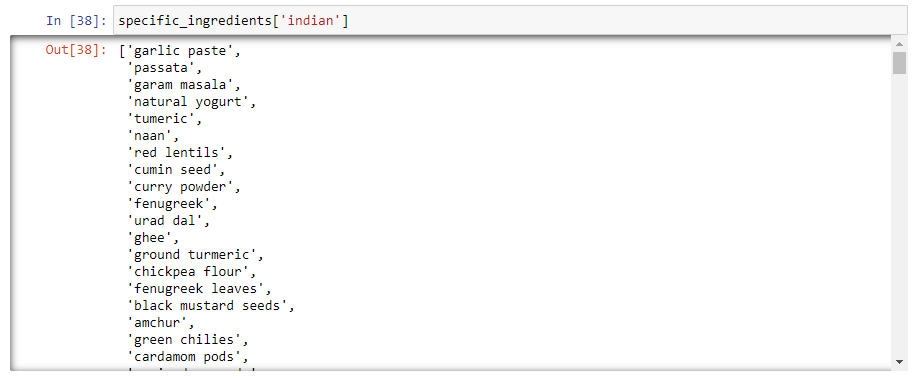

In the output, you can see <b>'garam masala'</b>. This ingredient can ONLY be found in indian cuisine, and this is what we mean by unique ingredients. 

As for total number of different ingredients, it also includes ingredients that can also be found in other cuisines. We have arranged this information into a paragraph as seen below

In [26]:
print("\n1: What are the different cuisines in the data?\n")
single_cuisines = cookingData['cuisine'].unique()
print(single_cuisines)
n_single_cuisines = len(single_cuisines)
print("Number of cuisines = "+str(n_single_cuisines))

# 1.2 Find the different ingredients stored in the data
print("\n2: How many different ingredients are there in the data?\n")
counted_ingredients = Counter(chain.from_iterable(cookingData['ingredients'].tolist())) # Builds a counter to count the occurences of each single ingredient
single_ingredients = list(counted_ingredients.keys()) # Builds a list will all single ingredients
n_single_ingredients = len(single_ingredients) # Counts the number of single ingredients
print("Number of single ingredients = " + str(n_single_ingredients))

# 1.3 Find the ingredients that are typical of one cuisine and find ingredients by cuisine
print("\n3: How many ingredients unique to that particular cuisine are there? How many different ingredients are used in each cuisine?\n")
specific_ingredients = {} # Will be a dict of lists
sorted_ingredients = {} # Will be a dict of Counters
sorted_not_specific_ingredients = {} # Will be a dict of lists
not_specific_ingredients = single_ingredients # Will be a list

for cuisine in single_cuisines :
    sorted_ingredients[cuisine] = Counter(chain.from_iterable(cookingData[cookingData['cuisine'] == cuisine].ingredients.tolist()))
    other_cuisines_ingredients = Counter(chain.from_iterable(cookingData[cookingData['cuisine'] != cuisine].ingredients.tolist()))
    intersection  = Counter(sorted_ingredients[cuisine]) & Counter(other_cuisines_ingredients)
    specific_ingredients[cuisine] = list(sorted_ingredients[cuisine] - intersection)
    not_specific_ingredients = list(Counter(not_specific_ingredients) - Counter(specific_ingredients[cuisine]))
    sorted_not_specific_ingredients[cuisine] = list(sorted_ingredients[cuisine] - Counter(specific_ingredients[cuisine]))
    # Print info about current cuisine
    print(cuisine + " cuisine has " + str(len(specific_ingredients[cuisine])) + " specific ingredients and uses "+ str(len(sorted_ingredients[cuisine])) + "  different ingredients")
 
sum_specific_ingredients = sum(len(v) for v in specific_ingredients.values())
sum_not_specific_ingredients = len(not_specific_ingredients)

print("\n" + str(sum_specific_ingredients) + " ingredients are specific to one cuisine and \n" + str(sum_not_specific_ingredients)+" ingredients are not specific to one cuisine")


1: What are the different cuisines in the data?

['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']
Number of cuisines = 20

2: How many different ingredients are there in the data?

Number of single ingredients = 6714

3: How many ingredients unique to that particular cuisine are there? How many different ingredients are used in each cuisine?

greek cuisine has 86 specific ingredients and uses 1198  different ingredients
southern_us cuisine has 446 specific ingredients and uses 2462  different ingredients
filipino cuisine has 78 specific ingredients and uses 947  different ingredients
indian cuisine has 270 specific ingredients and uses 1664  different ingredients
jamaican cuisine has 42 specific ingredients and uses 877  different ingredients
spanish cuisine has 64 specific ingredients and uses 1263  different ingredients
it

### Representing different ingredients and unique ingredients in visual format

This particular problem was more complicated than we had expected it to be. We could not use the original dataframe we had created just like that, so we had to modify our DataFrame into a form that we could actually plot a catplot with.

We needed a DataFrame that had 2 particular columns of information:
<ul>
    <li>Number of unique ingredients</li>
    <li>Number of different ingredients</li>
</ul>

In [27]:
df = pd.DataFrame.from_dict(specific_ingredients, orient ='index') 
differentdf = pd.DataFrame.from_dict(sorted_ingredients,orient='index')

In [28]:
df['Number of unique ingredients'] = df.notna().sum(axis=1)
differentdf['Number of different ingredients'] = differentdf.notna().sum(axis=1)

In [29]:
differentdf['Number of different ingredients']

greek           1198
southern_us     2462
indian          1664
spanish         1263
italian         2929
mexican         2684
chinese         1792
thai            1376
vietnamese      1108
cajun_creole    1576
french          2102
irish            999
korean           898
moroccan         974
russian          872
filipino         947
japanese        1439
jamaican         877
british         1166
brazilian        853
Name: Number of different ingredients, dtype: int64

In [30]:
df['Number of unique ingredients']

greek            86
southern_us     446
filipino         78
indian          270
jamaican         42
spanish          64
italian         852
mexican         716
chinese         317
british         110
thai            121
vietnamese       65
cajun_creole    148
brazilian        59
french          288
japanese        213
irish            49
korean           64
moroccan         48
russian          56
Name: Number of unique ingredients, dtype: int64

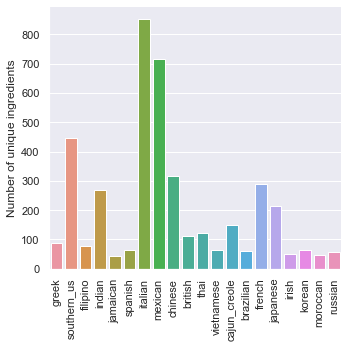

In [31]:
g = sb.catplot(x=df.index,
                y="Number of unique ingredients",
                kind="bar", 
                data=df)

plt.xticks(plt.xticks()[0], df.index, rotation=90)
plt.tight_layout()
plt.show()

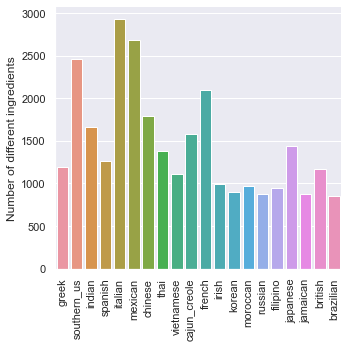

In [32]:
g = sb.catplot(x=differentdf.index,
                y="Number of different ingredients",
                kind="bar", 
                data=differentdf)

plt.xticks(plt.xticks()[0], differentdf.index, rotation=90)
plt.tight_layout()
plt.show()

### Relationship between unique and different ingredients count

In this dataset, what is the relationship between the number of unique ingredients and the number of different ingredients? To carry out this comparison, we had to add 2 additional columns which included the unique and different ingredient counts to the dataframe. And to do this, we had to combine 2 different dataframes together. Just for comparison, after we created the dataframe for unique ingredients, our dataframe looked like this;

>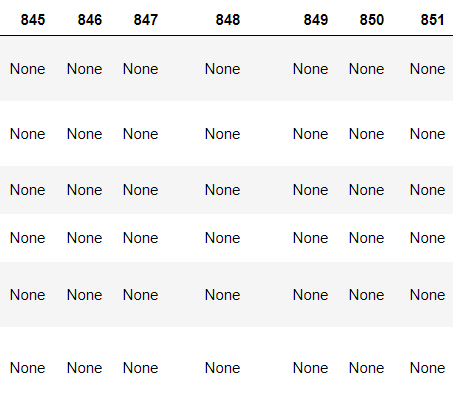

In [33]:
numberofdiffingred = differentdf["Number of different ingredients"]
df = df.join(numberofdiffingred)

### Relationship between unique and different ingredients count

After having combined the two pieces of data into our DataFrame named <b>df</b>, it now looks like this;
>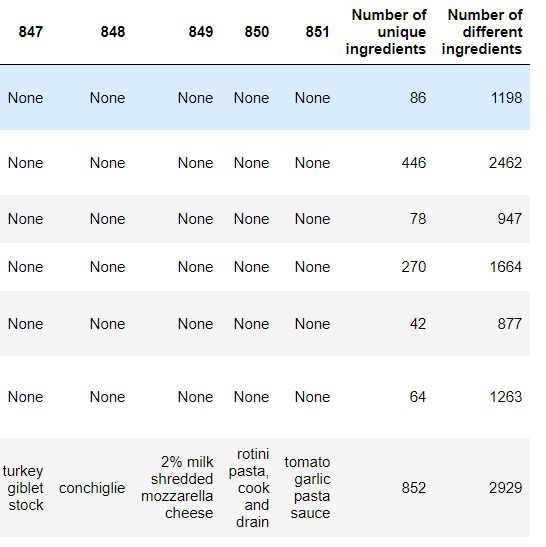

After doing so, to carry out bi-variate analysis, we had to store the unique and different ingredients into 2 seperate variables. Following which, we carried out the plots as seen below

In [34]:
diffingredients = pd.DataFrame(df['Number of different ingredients'])
uniqueingredients = pd.DataFrame(df['Number of unique ingredients'])

<AxesSubplot:>

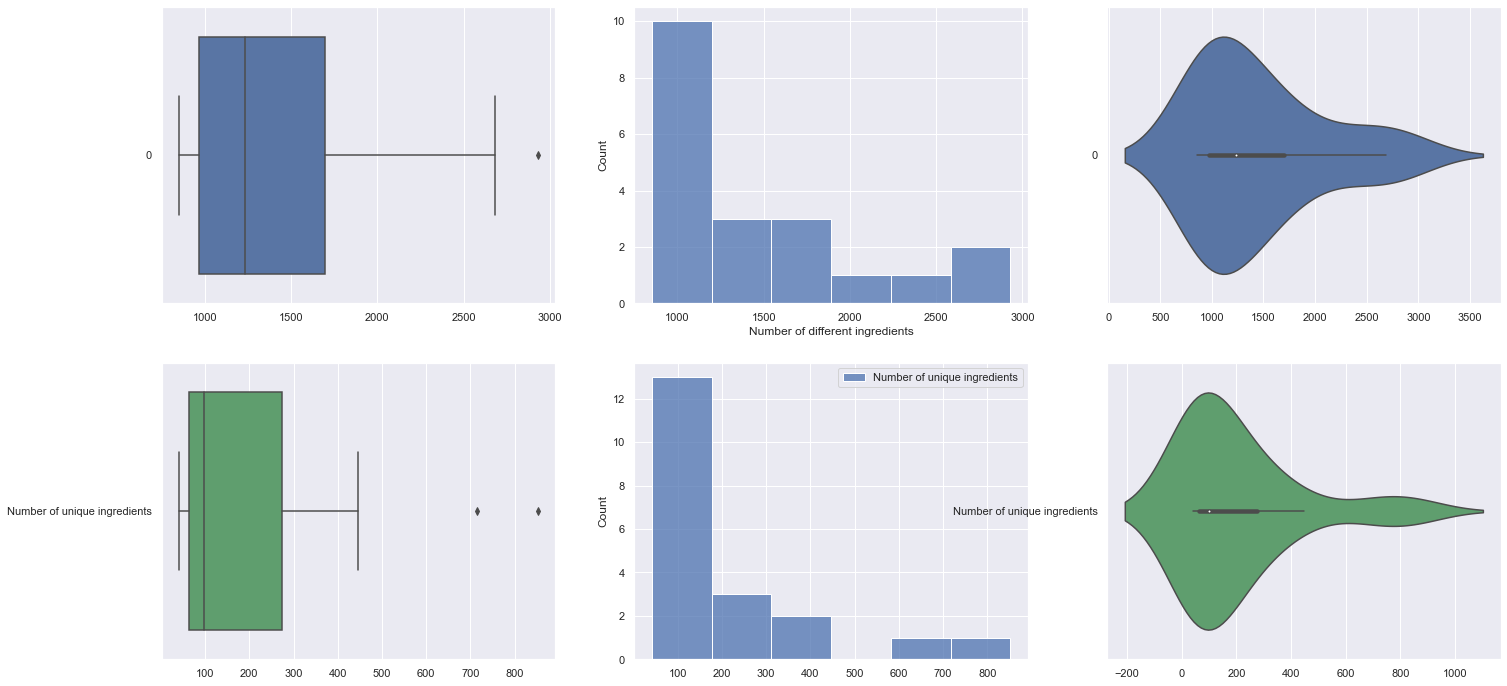

In [35]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = numberofdiffingred, orient = "h", ax = axes[0,0])
sb.histplot(data = numberofdiffingred, ax = axes[0,1])
sb.violinplot(data = numberofdiffingred, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = uniqueingredients, orient = "h", ax = axes[1,0], color = 'g')
sb.histplot(data = uniqueingredients, ax = axes[1,1], color = 'g')
sb.violinplot(data = uniqueingredients, orient = "h", ax = axes[1,2], color = 'g')

### Correlation between unique and different ingredients

To further investigate the correlation, we decided that we could use a scatterplot. We combined  the unique ingredients and different ingredients variables we used for the boxplot, histplot and violinplot, and created a combined dataframe.Following this, we created a scatterplot and heatmap for the correlations

In [36]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([uniqueingredients, diffingredients], axis = 1).reindex(uniqueingredients.index)
jointDF

Number of unique ingredients  Number of different ingredients
greek                                   86                             1198
southern_us                            446                             2462
filipino                                78                              947
indian                                 270                             1664
jamaican                                42                              877
spanish                                 64                             1263
italian                                852                             2929
mexican                                716                             2684
chinese                                317                             1792
british                                110                             1166
thai                                   121                             1376
vietnamese                              65                             1108
cajun_creole                           148                             1576
brazilian                               59                              853
french                                 288                             2102
japanese                               213                             1439
irish                                   49                              999
korean                                  64                              898
moroccan                                48                              974
russian                                 56                              872

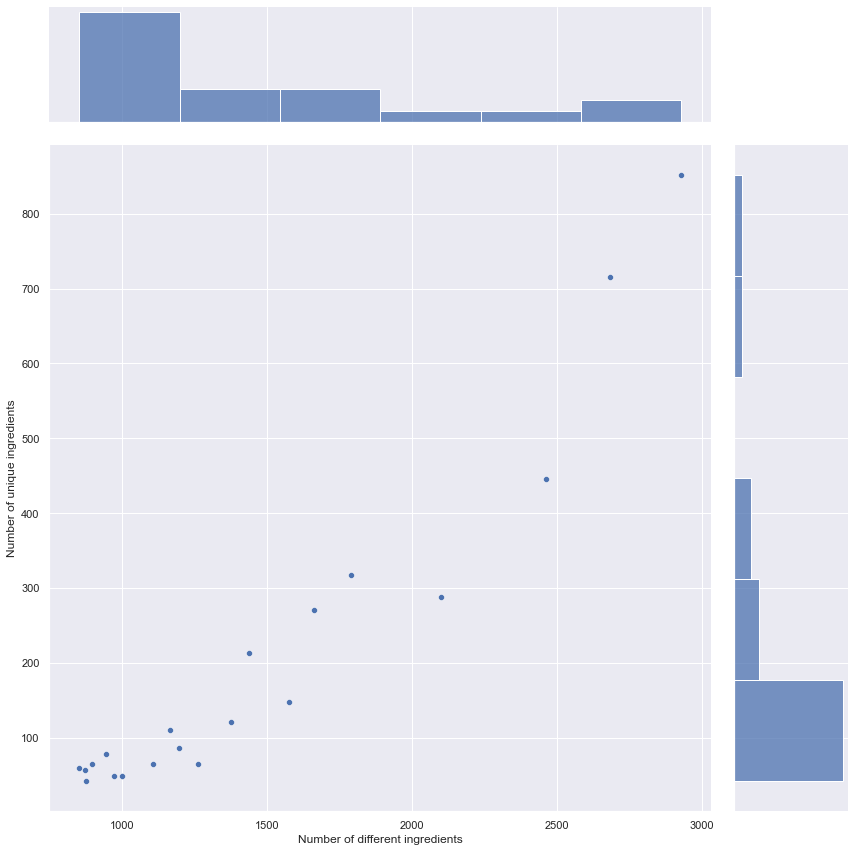

In [37]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "Number of different ingredients", y = "Number of unique ingredients", height = 12)

<AxesSubplot:>

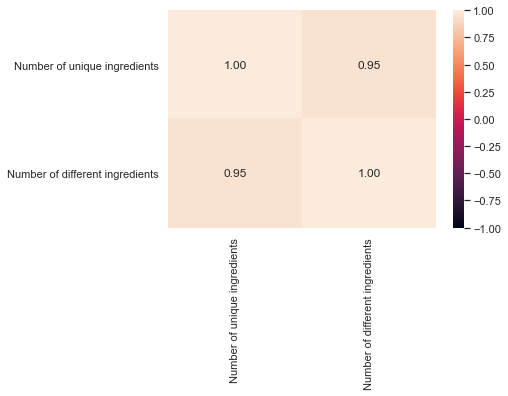

In [38]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")